<a href="https://colab.research.google.com/github/RaghavMaskara21/abc/blob/main/Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take Grayscale or binary image and perform the following Morphological
operations.
1. Morphological filtering – Opening followed by Closing
2. Hit and Miss Transformation
     cv2.morphology Ex(img,cv.MORPH_HITMISS,kernel)
3. Boundary Extraction
4. Thinning
5. Thickening

In [1]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from matplotlib.colors import LogNorm

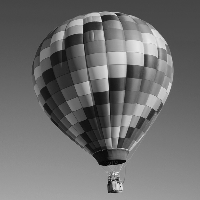

In [3]:
img = cv2.imread('pic1.jpg', cv2.IMREAD_UNCHANGED)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,[200,200]);
cv2_imshow(img)

In [4]:
kernel = np.ones((5,5),np.uint8)
kernel[0][1]=0;
kernel[0][3]=0;
kernel[1][0]=0;
kernel[1][4]=0;
kernel[3][0]=0;
kernel[3][4]=0;
kernel[4][1]=0;
kernel[4][3]=0;
print(kernel)

[[1 0 1 0 1]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [1 0 1 0 1]]


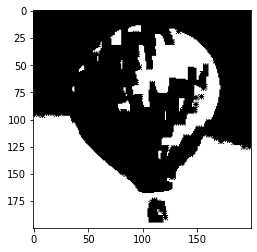

In [5]:
binary_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#erosion
erosion = cv2.erode(binary_image,kernel,iterations=1)
plt.imshow(erosion, cmap='gray')

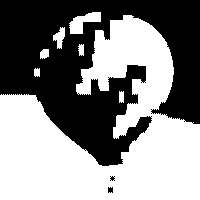

In [6]:
#Morphological filtering – Opening followed by Closing
morpo = cv2.morphologyEx(binary_image,cv2.MORPH_OPEN,kernel)
morpc = cv2.morphologyEx(morpo,cv2.MORPH_CLOSE,kernel)
cv2_imshow(morpc)

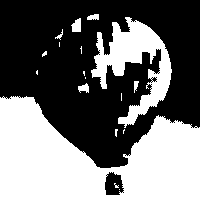

In [7]:
#Hit and Miss Transformation
hitmiss = cv2.morphologyEx(binary_image,cv2.MORPH_HITMISS,kernel)
cv2_imshow(hitmiss)

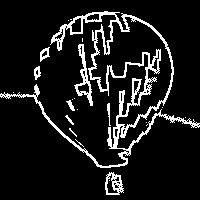

In [8]:
#Boundary Extraction
def subtraction(img1, img2):
  return np.clip(img1-img2, 0 ,255)
cv2_imshow(subtraction(binary_image , erosion))

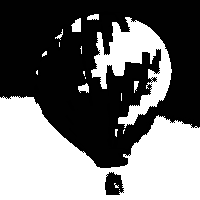

In [9]:
#Thinning of Image
def subtraction(img1, img2):
  return np.clip(img1-img2, 0 ,255)
cv2_imshow(subtraction(binary_image , 255-hitmiss))

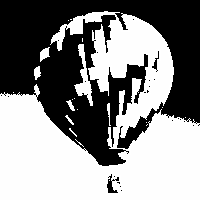

In [10]:
#Thickening of image
def addition(img1, img2):
  return np.clip(img1+img2, 0 ,255)
cv2_imshow(addition(binary_image , hitmiss))